In [71]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [72]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [74]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [76]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = base.classes.measurement
Station = base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [79]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [80]:
print(type(datetime))

<class 'type'>


# Exploratory Precipitation Analysis

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
most_recent_date = '2017-08-23'

# The date 1 year ago from the most recent data point in the database
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')


date_one_yr_ago_dt = most_recent_date_dt - timedelta(days=365)

# Convert the calculated date to a string in the format '%Y-%m-%d'
query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')


# Select only the date and prcp values.
last_year = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()
last_year






[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [82]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(last_year, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
last_year_df = last_year_df.set_index('Date')
last_year_df.sort_index(inplace=True)
last_year_df



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


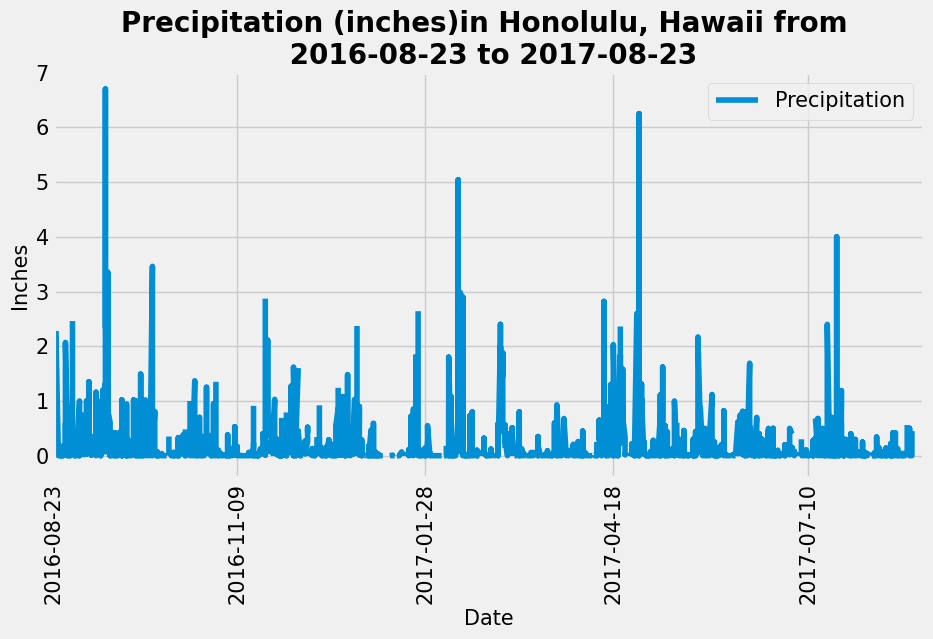

In [83]:
# Use Pandas Plotting with Matplotlib to plot the data
# Set plot and plot the chart
plt.figure(figsize=(10, 5))
plt.plot(last_year_df.index, last_year_df['Precipitation'])

# Add legned 
plt.legend(['Precipitation'], loc="upper right",fontsize=15)
# set x location
xloc = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'] 

# Assign xticks
plt.xticks(xloc, rotation='vertical',fontsize=15)
# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.title(f"Precipitation (inches)in Honolulu, Hawaii from \n {query_date} to {most_recent_date}",fontsize=20, fontweight = 'bold')
plt.yticks(size=15)

# Asign xlim and ylim
plt.xlim(0,370)
plt.ylim(-0.4,7)


# Save Figure
#plt.savefig("Images/Precipitation_Plot.png", bbox_inches = 'tight')
# Show plot
plt.show()

In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print("Total number of stations:", total_stations)

Total number of stations: 9


In [86]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ste = [Station.station, func.count(Measurement.station)]
session.query(*ste).filter(Station.station == Measurement.station).group_by(Station.station).\
                            order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == ste[0]).all()

[(53.0, 87.0, 73.09795396419437)]

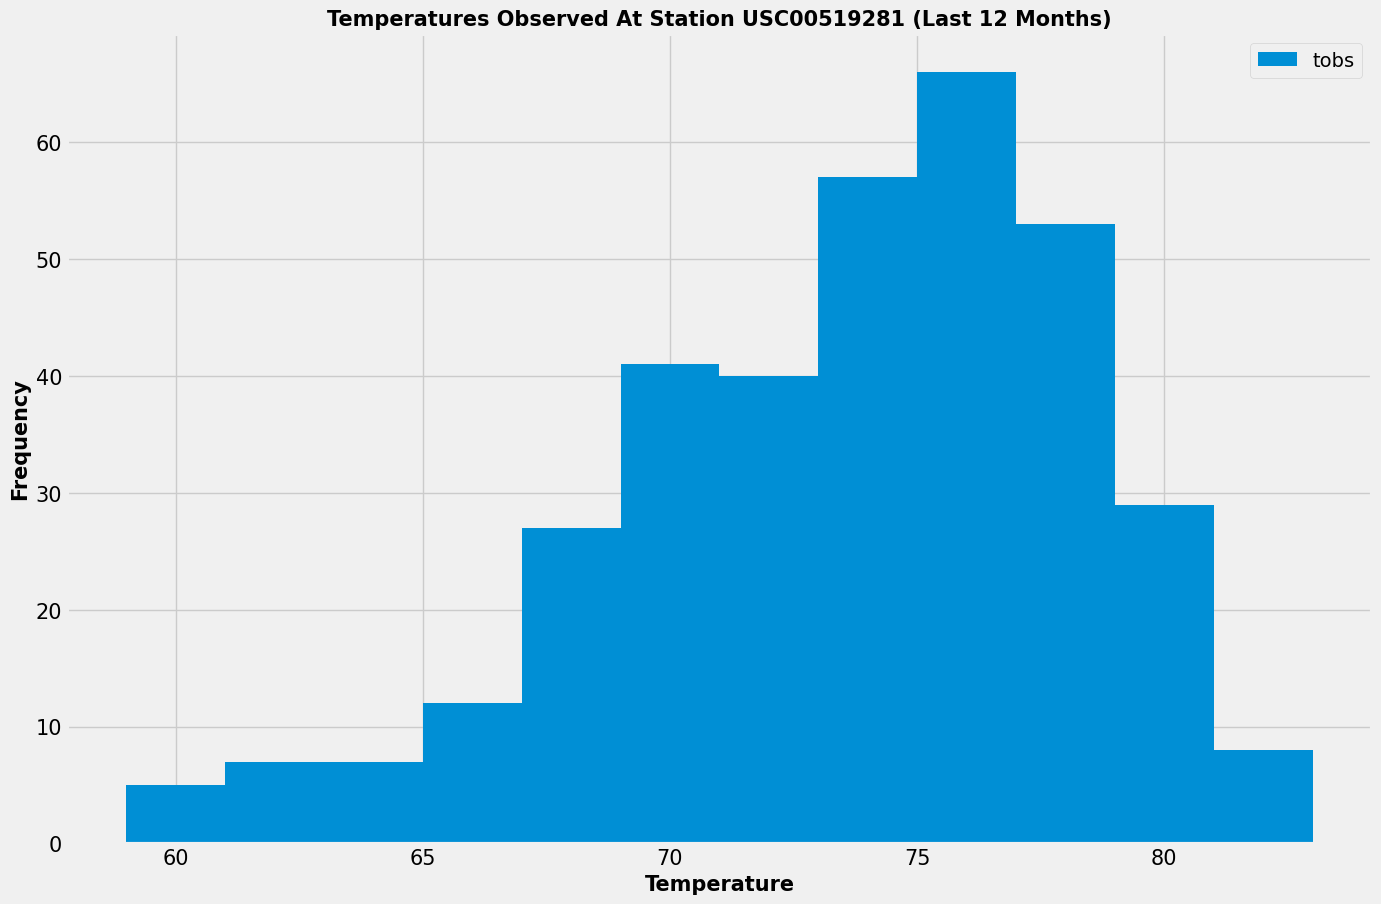

<Figure size 640x480 with 0 Axes>

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# 'USC00519281'
results = session.query(Measurement.tobs).\
            filter(Measurement.date.between(query_date,most_recent_date),\
                   Measurement.station == 'USC00519281').all()

# Plot the results as a histogram
plt.figure(figsize=(15,10))
plt.hist(np.ravel(results), bins=12)
plt.title('Temperatures Observed At Station USC00519281 (Last 12 Months)',fontsize=15, fontweight = 'bold')
plt.xlabel('Temperature',fontsize=15, fontweight = 'bold')
plt.ylabel('Frequency',fontsize=15, fontweight = 'bold')
plt.legend(['tobs'], loc = 'upper right')
plt.yticks(size=15)
plt.xticks(size=15)


# Show plot
plt.show()
plt.tight_layout()

# Close Session

In [89]:
# Close Session
session.close()